In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_PATH="./data/1/"
labels=os.listdir(DATA_PATH)

In [2]:
def speech2mfcc(file_path,max_len=11):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    wave=wave[::5]
    mfcc=librosa.feature.mfcc(wave,sr=sr)
#	print(mfcc)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

    else:
        mfcc=mfcc[:,:max_len]
#	print(mfcc.shape)
    return mfcc

In [19]:
mfcc_vectors=[]

for speech in labels:
    mfcc=speech2mfcc(DATA_PATH+speech)
    mfcc_vectors.append(mfcc)

mfcc_i=mfcc_vectors[0][0,]
n_mf=2

In [20]:
mfcc_i.shape

(11,)

In [21]:
for i,_ in enumerate(mfcc_vectors[1:]):
    mfcc_i=np.vstack((mfcc_i,mfcc_vectors[i+1][n_mf,]))

In [22]:
mfcc_i[mfcc_i ==0]=np.nan

In [23]:
std_1=np.nanstd(mfcc_i,axis=0)

Text(0.5, 1.0, 'Variation of MFCC-1')

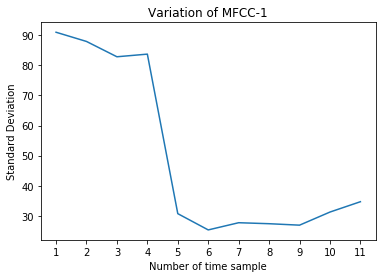

In [24]:
#plt.figure(figsize=(10,4))
plt.plot(range(1,12),std_1)
plt.xticks(range(1,12))
plt.xlabel('Number of time sample')
plt.ylabel('Standard Deviation')
plt.title('Variation of MFCC-1')